In [101]:
import os
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid", palette="Set2")
sns.set_context("paper")
plt.rcParams['savefig.dpi'] = 300

CONLL_0_CSV_PATH = Path("data", "wandb_export_classification_report_umw65ny0_k_shot_conll_0_try2.csv")
CONLL_1_CSV_PATH = Path("data", "wandb_export_classification_report_8c6qzb6i_k_shot_conll_1_try2.csv")
MIT_0_CSV_PATH = Path("data", "wandb_export_classification_report_99qgtcqk_k_shot_mit_try2.csv")
MIT_1_CSV_PATH = Path("data", "wandb_export_classification_report_logical-moon-1240.csv")
MIT_2_CSV_PATH = Path("data", "wandb_export_classification_report_vital-hill-1241.csv")
COMB_0_CSV_PATH = Path("data", "wandb_export_classification_report_n2pyk84e_k_shot_both_50.csv")
COMB_1_CSV_PATH = Path("data", "wandb_export_classification_report_clean-star-1263.csv")
BASELINE_CSV_PATH = Path("data", "wandb_export_classification_report_zett7p18_k_shot_baseline.csv")

relevant_columns = ["micro avg", "run_name", "run_corpus", "run_type", "k_shot_num"]

In [64]:
df_conll_0 = pd.read_csv(CONLL_0_CSV_PATH)
df_conll_1 = pd.read_csv(CONLL_1_CSV_PATH)

df_conll = pd.concat([df_conll_0, df_conll_1])
df_conll = df_conll.loc[(df_conll["metric"] == "f1-score") & (df_conll["k_shot_num"] > 1), relevant_columns]
df_conll = df_conll.reset_index(drop=True)

In [65]:
df_mit_0 = pd.read_csv(MIT_0_CSV_PATH)
df_mit_1 = pd.read_csv(MIT_1_CSV_PATH)
df_mit_2 = pd.read_csv(MIT_2_CSV_PATH)

df_mit = pd.concat([df_mit_0, df_mit_1, df_mit_2])
df_mit = df_mit.loc[(df_mit["metric"] == "f1-score") & (df_mit["k_shot_num"] > 1), relevant_columns]
df_mit = df_mit.reset_index(drop=True)

In [66]:
df_comb_0 = pd.read_csv(COMB_0_CSV_PATH)
df_comb_1 = pd.read_csv(COMB_1_CSV_PATH)

df_comb = pd.concat([df_comb_0, df_comb_1])
df_comb = df_comb.loc[(df_comb["metric"] == "f1-score"), relevant_columns]
df_comb = df_comb.reset_index(drop=True)

In [67]:
df_baseline = pd.read_csv(BASELINE_CSV_PATH)

df_baseline = df_baseline.loc[df_baseline["metric"] == "f1-score", relevant_columns]
df_baseline = df_baseline.reset_index(drop=True)

In [85]:
df = pd.concat([df_conll, df_mit, df_comb, df_baseline]).reset_index(drop=True)
df.loc[df["run_corpus"] == "NER_ENGLISH_RESTAURANT", "run_corpus"] = "MIT ENGLISH RESTAURANT"
df.loc[df["run_corpus"] == "CONLL03", "run_corpus"] = "CONLL 2003"
df.loc[df["run_type"].isna(), "run_type"] = "contrastive"
df["run_setting"] = df["run_type"].str.title() + " " + df["run_corpus"]
df

,micro avg,run_name,run_corpus,run_type,k_shot_num,run_setting
0,0.668986,major-sweep-40,CONLL 2003,contrastive,10,Contrastive CONLL 2003
1,0.365868,pious-sweep-39,CONLL 2003,contrastive,5,Contrastive CONLL 2003
2,0.385185,dry-sweep-38,CONLL 2003,contrastive,3,Contrastive CONLL 2003
3,0.487053,leafy-sweep-36,CONLL 2003,contrastive,10,Contrastive CONLL 2003
4,0.214736,gentle-sweep-35,CONLL 2003,contrastive,5,Contrastive CONLL 2003
...,...,...,...,...,...,...
195,0.774758,ancient-sweep-5,CONLL 2003,baseline,50,Baseline CONLL 2003
196,0.663522,misty-sweep-4,CONLL 2003,baseline,20,Baseline CONLL 2003
197,0.592883,faithful-sweep-3,CONLL 2003,baseline,10,Baseline CONLL 2003
198,0.291169,spring-sweep-2,CONLL 2003,baseline,5,Baseline CONLL 2003


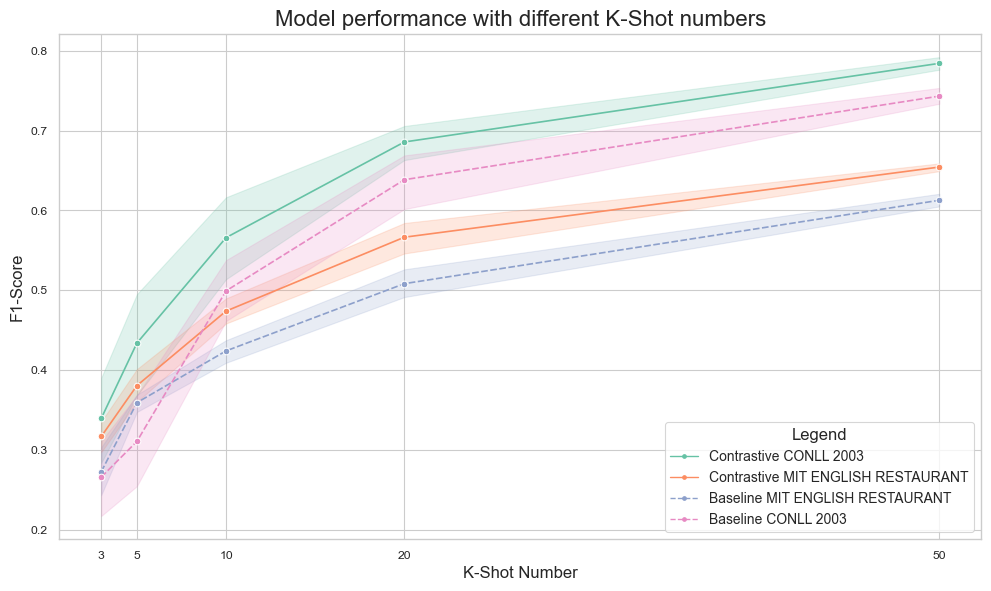

In [120]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='k_shot_num', y='micro avg', hue='run_setting', style="run_type", marker='o')

# Customize the plot
plt.title('Model performance with different K-Shot numbers', fontsize=16)
plt.xlabel('K-Shot Number', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.legend(title='Corpus and Setting', fontsize=10, title_fontsize=12)


# Get unique values for run_setting and run_type
run_settings = df['run_setting'].unique()
run_types = df['run_type'].unique()

# Create custom handles for the legend
handles = []
labels = []

# Add handles for run_setting (colors)
for setting in run_settings:
    line_drawstyle = "dashed" if "Baseline" in setting else "solid"
    handle = Line2D([0], [0], color=sns.color_palette()[list(run_settings).index(setting)], lw=1, marker=".", linestyle=line_drawstyle)
    handles.append(handle)
    labels.append(setting)

# Set the custom legend
plt.legend(handles=handles, labels=labels, title='Legend', fontsize=10, title_fontsize=12)

unique_k_shots = sorted(df['k_shot_num'].unique())
plt.xticks(unique_k_shots)

# Show the plot
plt.tight_layout()

save_path = Path("output_figs", "k_shot_fig.png")
plt.savefig(save_path, bbox_inches='tight')
plt.show()